<a href="https://colab.research.google.com/github/Venetsiyalik/bot/blob/main/Image_Processing_Day_2_Students_ipynb_f4fd6cedaff7fd4f082e126276221559_(2)_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Edges**

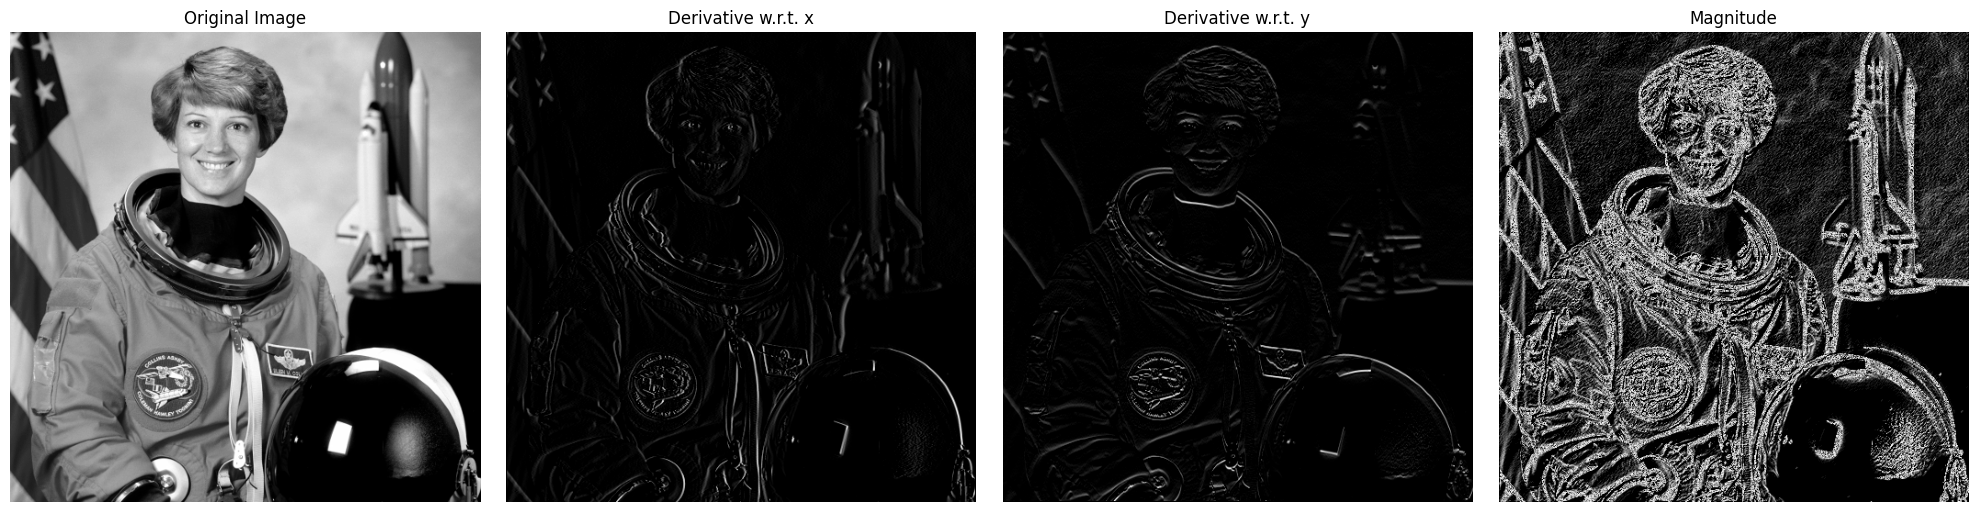

In [ ]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 1. Load astronaut image and convert to grayscale
image = data.astronaut()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 2. Calculate the derivative w.r.t. x and y
dx_filter = -1 * np.array([[-1, 0, 1]])
dy_filter = dx_filter.T  # Transpose for y direction

# Apply the filters using cv2.filter2D
dx = cv2.filter2D(gray_image, -1, dx_filter)  # Derivative in x-direction
dy = cv2.filter2D(gray_image, -1, dy_filter)  # Derivative in y-direction

# 3. Calculate the magnitude and theta
magnitude = np.sqrt(dx**2 + dy**2)
theta = np.arctan2(dy, dx) * 180 / np.pi

# 4. Plot the results using matplotlib
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Derivative w.r.t x
axs[1].imshow(dx, cmap='gray')
axs[1].set_title('Derivative w.r.t. x')
axs[1].axis('off')

# Derivative w.r.t y
axs[2].imshow(dy, cmap='gray')
axs[2].set_title('Derivative w.r.t. y')
axs[2].axis('off')

# Magnitude
axs[3].imshow(magnitude, cmap='gray')
axs[3].set_title('Magnitude')
axs[3].axis('off')

plt.tight_layout()
plt.show()

**All Edges**

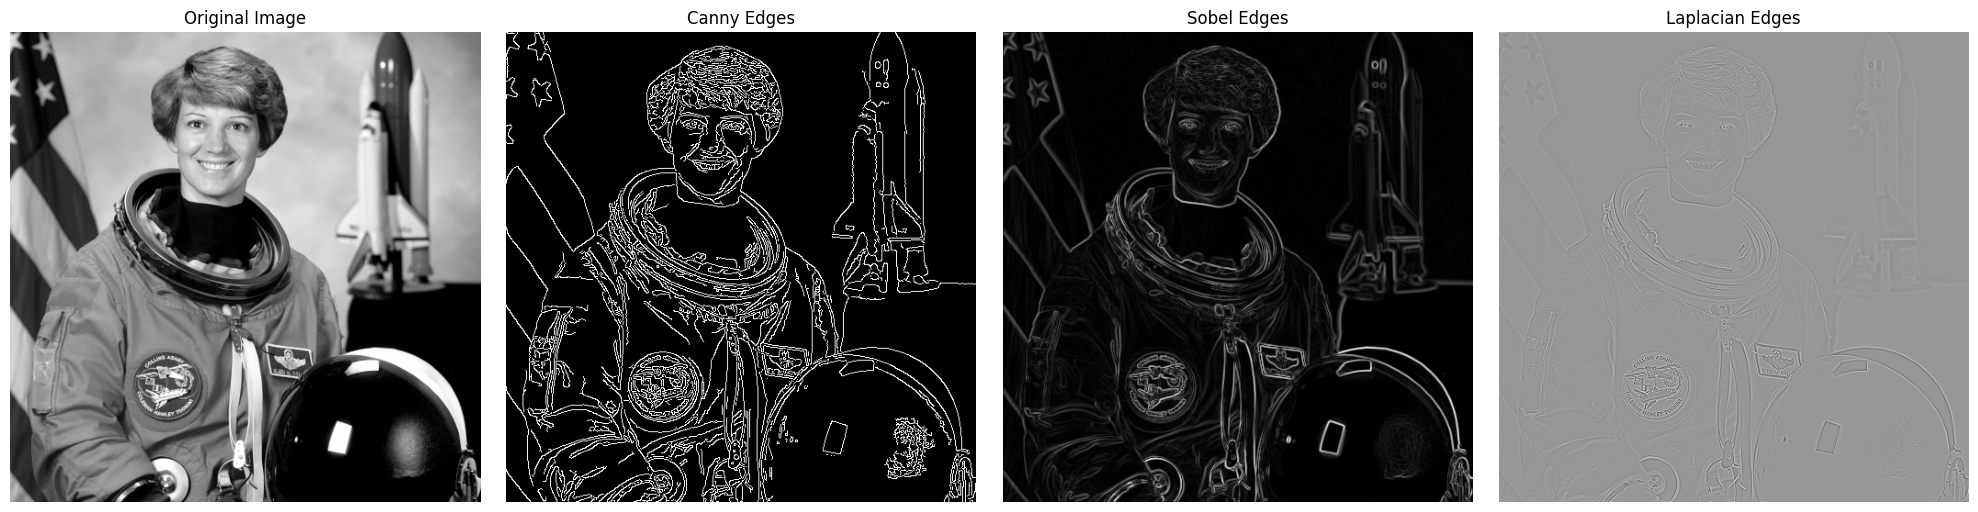

In [ ]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# 1. Read astronaut image and convert to grayscale
image = data.astronaut()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Add your Code here
# 2. Apply Canny edge detector
edges_canny =


# 3. Apply Sobel operator
sobel_x =
sobel_y =
edges_sobel =

# 4. Apply the Laplacian
edges_laplacian =
# Finish your Code here


# 5. Show and compare the results in one plot
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Canny edges
axs[1].imshow(edges_canny, cmap='gray')
axs[1].set_title('Canny Edges')
axs[1].axis('off')

# Sobel edges
axs[2].imshow(edges_sobel, cmap='gray')
axs[2].set_title('Sobel Edges')
axs[2].axis('off')

# Laplacian edges
axs[3].imshow(edges_laplacian, cmap='gray')
axs[3].set_title('Laplacian Edges')
axs[3].axis('off')

plt.tight_layout()
plt.show()


**Hough**

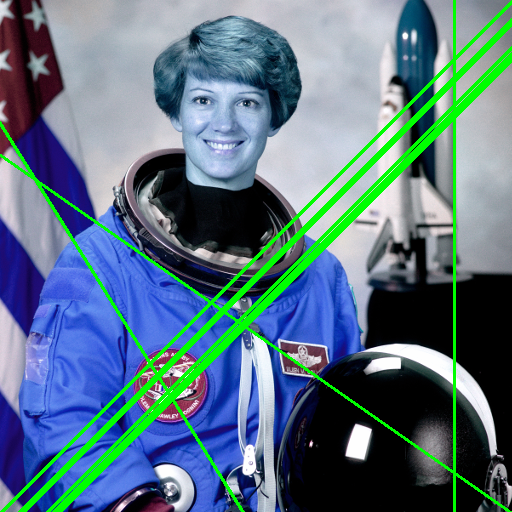

In [ ]:
import cv2
import numpy as np
from skimage import data
from google.colab.patches import cv2_imshow

# 1. Read astronaut image and convert to grayscale
image = data.astronaut()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 2. Use Canny edge detector to detect edges
# The first parameter is the source image.
# The next two parameters are the lower and upper thresholds for the edges. If a pixel gradient is below the lower threshold, it is rejected.
# If it's above the higher threshold, it is considered as an edge. If it's between the two thresholds, it's considered as an edge only if it's connected to a pixel with a gradient above the higher threshold.
edges = cv2.Canny(gray_image, 50, 150)


#Add your Code here
# 3. Apply Hough Line Transform with a lowered threshold to detect more lines
lines =
# Finish adding your code here
# 4. Draw lines on the original image
drawn_image = image.copy()
if lines is not None:  # Check if lines were detected
    for i, line in enumerate(lines):
        if i > 9:  # Limit to first 10 lines
            break
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(drawn_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 5. Display the result
cv2_imshow(drawn_image)


**Frequency Space**

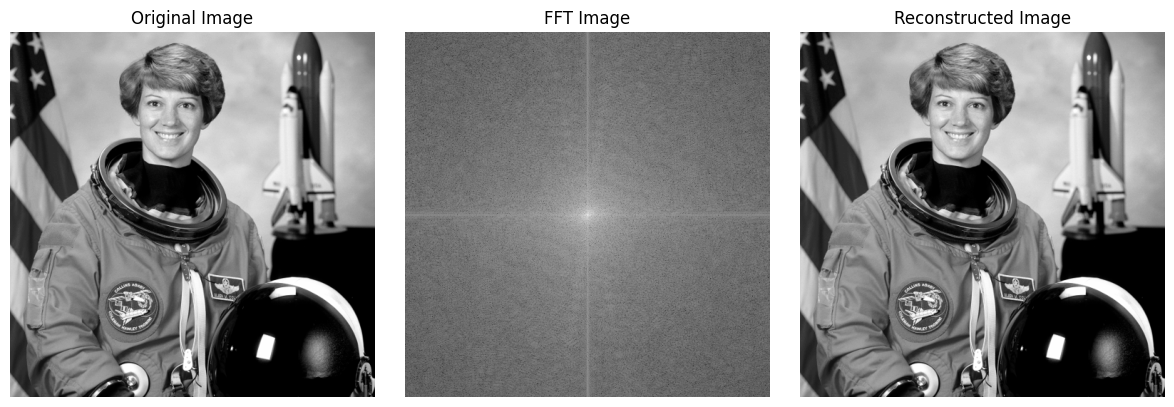

In [ ]:
from skimage import data
import numpy as np
from matplotlib import pyplot as plt

img = data.astronaut()
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Add your Code here
# Apply FFT and FFT Shift:
f =
fshift =

# Apply Inverse FFT:
img_reconstructed =
#finish your code here


# Visualize Original, Transformed, and Reconstructed Image:#
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1), plt.imshow(gray_img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray')
plt.title('FFT Image'), plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image'), plt.axis('off')

plt.tight_layout()
plt.show()


**Convolution in Frequency Space**

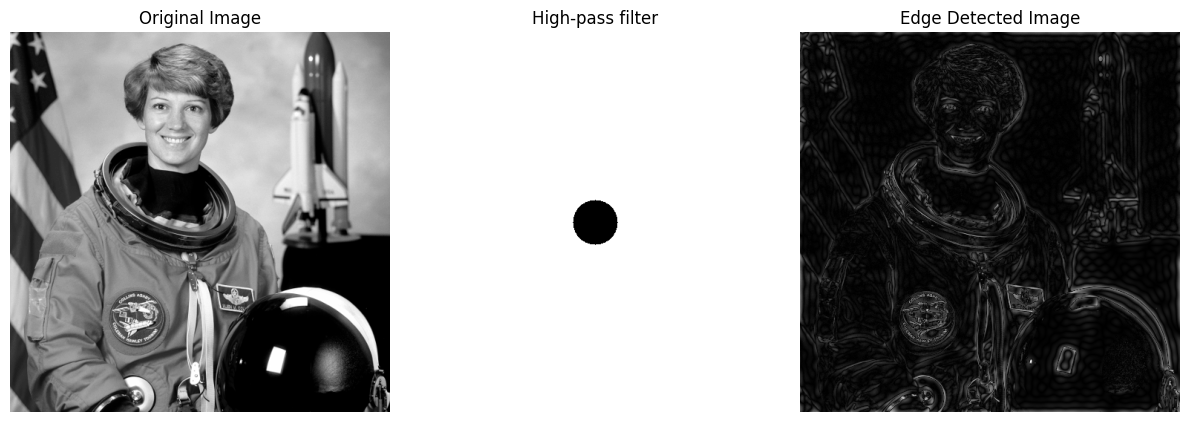

In [ ]:
import numpy as np
import cv2
from skimage import data
from matplotlib import pyplot as plt

# 1. Read the astronaut image and convert to grayscale
image = data.astronaut()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 2. Compute the 2D FFT and shift the zero-frequency component to the center
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)

# 3. Create a High-pass filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2

# Here we create a mask with a 30x30 square in the center set to 1 (pass) and the rest set to 0 (block)
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius of the mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

#Add your Code here
# 4. Apply the mask to the shifted FFT
fshift =

# 5. Inverse FFT to get the image back
f_ishift =
img_back =
img_back = np.abs(img_back)
#finish your code here


# 6. Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('High-pass filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.tight_layout()
plt.show()


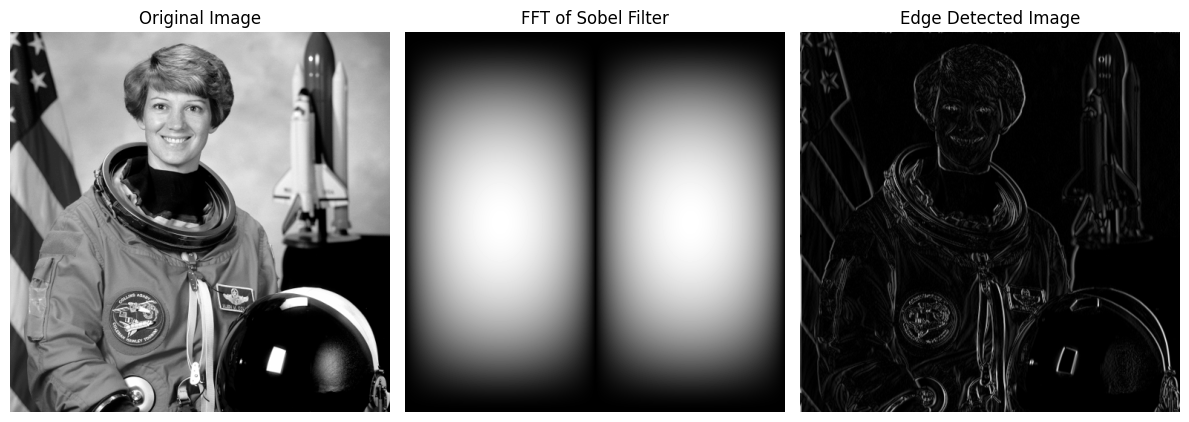

In [ ]:
import numpy as np
import cv2
from skimage import data
from matplotlib import pyplot as plt

#Add your Code here
# 1. Read the astronaut image and convert to grayscale


# 2. Compute the 2D FFT of the image and shift the zero-frequency component to the center

# 3. Create a Sobel filter and compute its FFT


# 4. Multiply the two shifted FFTs

# 5. Inverse FFT to get the image back


# 6. Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(fshift_sobel_x)), cmap='gray')
plt.title('FFT of Sobel Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.tight_layout()
plt.show()
